真实参数: [10, 0.34, 0.5235987755982988]
拟合参数 [ 9.66763073  0.33651102  0.44077635]


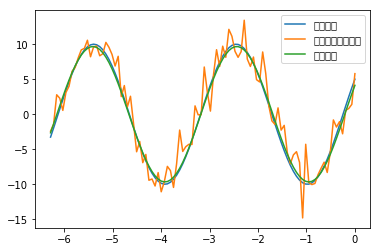

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.optimize import leastsq
import pylab as pl


def func(x, p):
    """
    数据拟合所用的函数: A*sin(2*pi*k*x + theta)
    """
    A, k, theta = p
    return A * np.sin(2 * np.pi * k * x + theta)


def residuals(p, y, x):
    """
    实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数
    """
    return y - func(x, p)


x = np.linspace(0, -2 * np.pi, 100)
A, k, theta = 10, 0.34, np.pi / 6  # 真实数据的函数参数
y0 = func(x, [A, k, theta])  # 真实数据
y1 = y0 + 2 * np.random.randn(len(x))  # 加入噪声之后的实验数据    

p0 = [7, 0.2, 0]  # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合参数的初始值
# args为需要拟合的实验数据
plsq = leastsq(residuals, p0, args=(y1, x))

print u"真实参数:", [A, k, theta]
print u"拟合参数", plsq[0]  # 实验数据拟合后的参数

pl.plot(x, y0, label=u"真实数据")
pl.plot(x, y1, label=u"带噪声的实验数据")
pl.plot(x, func(x, plsq[0]), label=u"拟合数据")
pl.legend()
pl.show()
